## Load and Preprocess the Data

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load the dataset
data = pd.read_csv("train.csv")

# Separate features (pixels) and labels (digits)
X = data.drop('label', axis=1).values
y = data['label'].values

# Normalize pixel values (scale from 0 to 1)
X = X / 255.0

# Reshape the features into 28x28x1 for CNN input
X = X.reshape(X.shape[0], 28, 28, 1)

# Convert labels to one-hot encoding
y = to_categorical(y, num_classes=10)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the data
print(f"Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Validation data shape: {X_val.shape}, Validation labels shape: {y_val.shape}")

Training data shape: (33600, 28, 28, 1), Training labels shape: (33600, 10)
Validation data shape: (8400, 28, 28, 1), Validation labels shape: (8400, 10)


## Build the CNN Model

In [2]:
model = Sequential()

# 1st Conv Layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Conv Layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the output
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))

# Dropout to prevent overfitting
model.add(Dropout(0.5))

# Output layer (10 classes for digits 0-9)
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

## Train the Model

In [3]:
# Train the CNN model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/10
525/525 [==============================] - 30s 53ms/step - loss: 0.3197 - accuracy: 0.9014 - val_loss: 0.0843 - val_accuracy: 0.9754
Epoch 2/10
525/525 [==============================] - 24s 47ms/step - loss: 0.1078 - accuracy: 0.9679 - val_loss: 0.0630 - val_accuracy: 0.9801
Epoch 3/10
525/525 [==============================] - 28s 53ms/step - loss: 0.0797 - accuracy: 0.9763 - val_loss: 0.0538 - val_accuracy: 0.9844
Epoch 4/10
525/525 [==============================] - 24s 46ms/step - loss: 0.0655 - accuracy: 0.9803 - val_loss: 0.0387 - val_accuracy: 0.9880
Epoch 5/10
525/525 [==============================] - 24s 46ms/step - loss: 0.0526 - accuracy: 0.9840 - val_loss: 0.0422 - val_accuracy: 0.9868
Epoch 6/10
525/525 [==============================] - 24s 46ms/step - loss: 0.0450 - accuracy: 0.9861 - val_loss: 0.0346 - val_accuracy: 0.9886
Epoch 7/10
525/525 [==============================] - 24s 47ms/step - loss: 0.0422 - accuracy: 0.9872 - val_loss: 0.0366 - val_accuracy:

## Evaluate the Model

263/263 [==============================] - 2s 9ms/step - loss: 0.0308 - accuracy: 0.9906
Validation Loss: 0.0308, Validation Accuracy: 0.9906


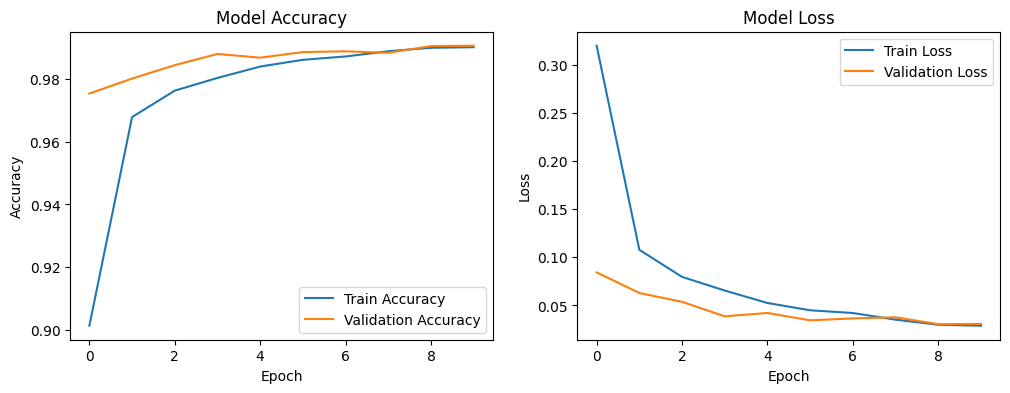

In [4]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

# Plot the training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()

## Make Predictions

263/263 [==============================] - 2s 7ms/step


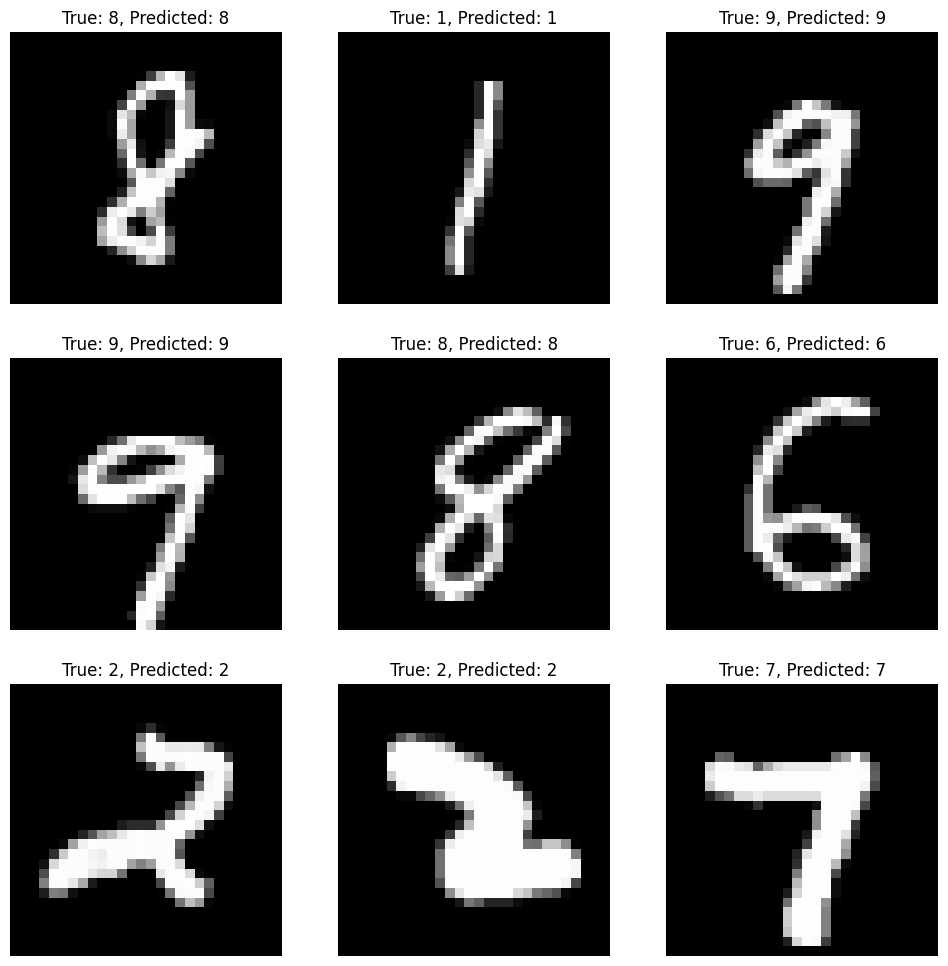

In [5]:
# Making predictions on validation set
predictions = model.predict(X_val)

# Convert predictions from one-hot encoding to class labels
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_val, axis=1)

# Display some images with their predicted and true labels
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_val[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {true_classes[i]}, Predicted: {predicted_classes[i]}")
    plt.axis('off')
plt.show()